In [1]:
import pandas as pd
import os
import numpy as np
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D,ZeroPadding2D,AveragePooling2D
from keras.utils import np_utils
import cv2
import skimage
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir("./drive/My Drive/dataset/train/asl_alphabet_train")

In [0]:
def get_data(start,end):
  print("Reading Files")
  x=[]
  y=[]
  vv=-1
  for f in os.listdir(".././asl_alphabet_train"):
    if not f.startswith('.' and 'm'):
      if f.startswith('p'):
        continue
      vv=vv+1
      if vv%3==0:
        print("Files Completed:")
        print(vv)
      if f in ['A']:
        label=0
      elif f in ['B']:
        label=1
      elif f in ['C']:
        label=2
      elif f in ['D']:
        label=3
      elif f in ['E']:
        label=4
      elif f in ['F']:
        label=5
      elif f in ['G']:
        label=6
      elif f in ['H']:
        label=7
      elif f in ['I']:
        label=8
      elif f in ['J']:
        label=9
      elif f in ['K']:
        label=10
      elif f in ['L']:
        label=11
      elif f in ['M']:
        label=12
      elif f in ['N']:
        label=13
      elif f in ['O']:
        label=14
      elif f in ['P']:
        label=15
      elif f in ['Q']:
        label=16
      elif f in ['R']:
        label=17
      elif f in ['S']:
        label=18
      elif f in ['T']:
        label=19
      elif f in ['U']:
        label=20
      elif f in ['V']:
        label=21
      elif f in ['W']:
        label=22
      elif f in ['X']:
        label=23
      elif f in ['Y']:
        label=24
      elif f in ['Z']:
        label=25
      elif f in ['del']:
        label=26
      elif f in ['nothing']:
        label=27
      elif f in ['space']:
        label=28
      else:
        label=29
      s1=-1
      for image in os.listdir('./'+f):
        s1+=1
        if s1<start:
          continue
        if s1>end:
          break
        img_file=cv2.imread('./'+f+'/'+image)
        img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
        #img_file=sobel_converter(img_file)
        if img_file is not None:
          img_file = skimage.transform.resize(img_file, (50,50,1))
          img_arr = np.asarray(img_file)
          x.append(img_arr)
          y.append(label)
  x=np.asarray(x)
  y=np.asarray(y)
  print("Reading Completed")
  return x,y

In [5]:
model=Sequential()
model.add(Conv2D(32,(2,2),padding='same',input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(Conv2D(64,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(0.25))
#model.add(Conv2D(256,(2,2),padding='same'))
#model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(512,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
#model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
#model.add(Dense(1024))
#model.add(Activation('relu'))
model.add(Dense(30,activation='softmax'))  

W0721 05:33:10.013012 140645424199552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 05:33:10.070698 140645424199552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 05:33:10.078715 140645424199552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 05:33:10.132025 140645424199552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0721 05:33:10.136213 140645424199552 deprecation_wrapp

In [7]:
pwd

'/content/drive/My Drive/dataset/train/asl_alphabet_train'

In [8]:
x,y=get_data(0,150)
y=np_utils.to_categorical(y,num_classes=30)
print(y)
x,y= shuffle(x,y,random_state=13)

Reading Files
Files Completed:
0
Files Completed:
3
Files Completed:
6
Files Completed:
9
Files Completed:
12
Files Completed:
15
Files Completed:
18
Files Completed:
21
Files Completed:
24
Files Completed:
27
Reading Completed
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

filepath="model1.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model.fit(x,y,epochs=30,batch_size=32,verbose=1,callbacks=callbacks_list)
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

W0721 06:11:03.575987 140645424199552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 06:11:03.616619 140645424199552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0721 06:11:03.767424 140645424199552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
4379/4379 [==============================] - 11s 3ms/step - loss: 3.3897 - acc: 0.0288

Epoch 00001: loss improved from inf to 3.38968, saving model to model1.h5
Epoch 2/30
4379/4379 [==============================] - 5s 1ms/step - loss: 3.3777 - acc: 0.0279

Epoch 00002: loss improved from 3.38968 to 3.37768, saving model to model1.h5
Epoch 3/30
4379/4379 [==============================] - 5s 1ms/step - loss: 3.3760 - acc: 0.0274

Epoch 00003: loss improved from 3.37768 to 3.37600, saving model to model1.h5
Epoch 4/30
4379/4379 [==============================] - 5s 1ms/step - loss: 3.3701 - acc: 0.0329

Epoch 00004: loss improved from 3.37600 to 3.37007, saving model to model1.h5
Epoch 5/30
4379/4379 [==============================] - 5s 1ms/step - loss: 3.0834 - acc: 0.0799

Epoch 00005: loss improved from 3.37007 to 3.08342, saving model to model1.h5
Epoch 6/30
4379/4379 [==============================] - 5s 1ms/step - loss: 2.6789 - acc: 0.1624

Epoch 00006: loss improve

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


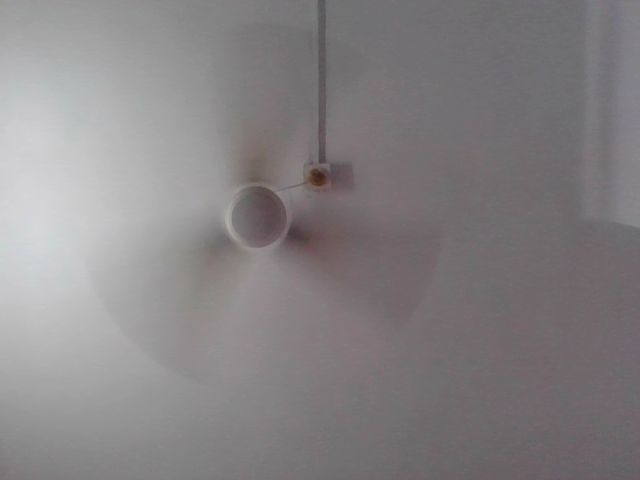

In [145]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
n=load_model("model1.h5")

In [146]:
op2=[]
op=cv2.imread('./photo.jpg')
#op=sobel_converter(op)
op = cv2.cvtColor(op, cv2.COLOR_BGR2GRAY)
op1 = skimage.transform.resize(op, (50,50,1))
img_arr = np.asarray(op1)
op2.append(img_arr)
op2=np.asarray(op2)
op3=n.predict(op2)
op3#This is an array consisting the probability of each label

array([[1.32521185e-14, 7.65890208e-16, 7.19505566e-11, 8.91911823e-16,
        1.33140704e-13, 4.94088802e-15, 2.34405899e-08, 5.15870102e-09,
        1.45056069e-14, 1.33833140e-07, 8.88601089e-15, 2.19412069e-15,
        3.76178498e-11, 8.33045100e-09, 2.89447684e-08, 6.61506832e-08,
        3.33867746e-07, 1.92324756e-09, 1.14605058e-07, 3.30555527e-10,
        5.62985804e-07, 3.93427015e-08, 9.42509126e-11, 3.02344233e-06,
        1.17135801e-09, 6.65153349e-11, 9.84752502e-10, 9.99995708e-01,
        2.19955765e-09, 1.27824002e-20]], dtype=float32)

In [147]:
#Prints the predicted letter
z=-1
i1=-1
for i in range(0,30):
  if z<op3[0][i]:
    z=op3[0][i]
    i1=i
if i1==0:
  print('A')
elif i1==1:
  print('B')
elif i1==2:
  print('C')
elif i1==3:
  print('D')
elif i1==4:
  print('E')
elif i1==5:
  print('F')
elif i1==6:
  print('G')
elif i1==7:
  print('H')
elif i1==8:
  print('I')
elif i1==9:
  print('J')
elif i1==10:
  print('K')
elif i1==11:
  print('L')
elif i1==12:
  print('M')
elif i1==13:
  print('N')
elif i1==14:
  print('O')
elif i1==15:
  print('P')
elif i1==16:
  print('Q')
elif i1==17:
  print('R')
elif i1==18:
  print('S')
elif i1==19:
  print('T')
elif i1==20:
  print('U')
elif i1==21:
  print('V')
elif i1==22:
  print('W')
elif i1==23:
  print('X')
elif i1==24:
  print('Y')
elif i1==25:
  print('Z')
elif i1==26:
  print('del')
elif i1==27:
  print('nothing')
elif i1==28:
  print('space')
elif i1==29:
  print('else') 

nothing
